In [1]:
%matplotlib inline
import lsst.sims.maf.utils as mafUtils
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

import matplotlib.pylab as plt

In [3]:
# Because the schema mostly matches opsimV4, we can use this connection
database = db.OpsimDatabaseV4('feature_baseline_10yrs.db')

In [7]:
# Let's count up all the observations taken in year 2
year = 2
bundleList = []
slicer = slicers.HealpixSlicer(lonCol='fieldRA', latCol='fieldDec')
metric = metrics.CountMetric(col='fieldRA')
sql='night > %i and night < %i' % ((year-1)*365.25, year*365.25)
plotDict={'percentileClip':95.}
bundleList.append(metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict,
                                             plotFuncs=[plots.HealpixSkyMap()]))


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint night > 365 and night < 730 for columns ['fieldDec', 'fieldRA']
Found 227838 visits
Running:  ['opsim_Count_fieldRA_night_gt_365_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 365 and night < 730" constraint now.
Plotting complete.


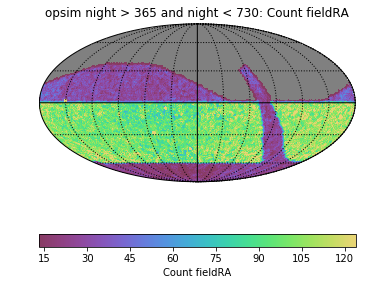

In [8]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
mb = metricBundles.MetricBundleGroup(bd, database)
mb.runAll()
mb.plotAll(closefigs=False)